In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">04_tensorflow_v1_feat.스케일조정</font></b>

# 1. tensorflow v2.xx에서 v1사용하기

In [25]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #v2를 활성화하고 v1활성화 
import pandas as pd
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터흐름그래프(tensor객체의 흐름)
- 이 그래프는 node(상수,변수,연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인 

In [ ]:
#tensor 

In [5]:
#간단한 연산 tensor 그래프
node1 = tf.constant(10,dtype=tf.float16)
node2 = tf.constant(20,dtype=tf.float16)
node3 = tf.add(node1,node2)
sess = tf.Session()
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [6]:
#타입변경
node1 = tf.constant(np.array([1,2,3]),dtype=tf.int16)
node2= tf.cast(node1,dtype=tf.float32)
sess = tf.Session()
sess.run([node1,node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [7]:
#평균값 계산: tf.reduce_mean()
data = np.array([1.,2.,3.])
tensor = tf.reduce_mean(data)
sess= tf.Session()
sess.run(tensor )

2.0

In [8]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([ 1.0442607, -0.4225237], dtype=float32),
 array([-1.1596162], dtype=float32)]

In [10]:
w= tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #w변수의 난수 초기화
sess.run(w)

array([0.11547122], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
 ## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [30]:
x= np.array([1,2,3])
y= np.array([2,3,4])
# weight 오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W= tf.Variable(tf.random.normal([1]), name='weight')
b= tf.Variable(tf.random.normal([1]), name='bias')
#Hypothesis: 예측값
H = W*x + b
#cost funcion(손실함수=mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적: cost가 최소가 되는 w, b를 찾아내는 것
cost는 2차 함수이므로 곡선그래프 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradiantDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#세션생성
sess = tf.Session()
# w,b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습(v2에서는 fit 함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:10.516520500183105, W:[-0.28432935], b:[0.88216996]
200번째 cost:0.007725967094302177, W:[0.8981579], b:[1.2315109]
400번째 cost:0.002950165420770645, W:[0.93706757], b:[1.1430601]
600번째 cost:0.0011265022912994027, W:[0.96111196], b:[1.0884017]
800번째 cost:0.00043014794937334955, W:[0.97596973], b:[1.0546265]
1000번째 cost:0.00016425451030954719, W:[0.9851506], b:[1.0337563]
1200번째 cost:6.272047903621569e-05, W:[0.9908239], b:[1.0208592]
1400번째 cost:2.39488927036291e-05, W:[0.9943299], b:[1.0128894]
1600번째 cost:9.14489555725595e-06, W:[0.99649626], b:[1.0079648]
1800번째 cost:3.49227775586769e-06, W:[0.99783486], b:[1.0049219]
2000번째 cost:1.3333743709154078e-06, W:[0.998662], b:[1.0030415]
2200번째 cost:5.093095296615502e-07, W:[0.99917305], b:[1.0018798]
2400번째 cost:1.9461451472579938e-07, W:[0.9994888], b:[1.001162]
2600번째 cost:7.448253569464214e-08, W:[0.9996837], b:[1.0007188]
2800번째 cost:2.866478077123702e-08, W:[0.99980396], b:[1.0004458]
3000번째 cost:1.1020413914764049e-08, W:[0.99

In [20]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([0.07697687], dtype=float32), array([0.9999811], dtype=float32)]

In [21]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(0.076976866, 0.9999811)

In [22]:
def predict(x):
    return W_[0]*x + b_[0]

In [23]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?5
예측값은  1.3848654329776764


## 2.5 입력(독립) 변수 x가 3개, 타겟(종속)변수 y가 1개(csv->array)

In [6]:
# 방법1 : csv -> array
import numpy as np
#data = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8') # 결측치, header가 없어야 함
data = np.genfromtxt('data/ozone.csv',
                    delimiter=',',
                    skip_header=1,
                    missing_values='NA',
                    filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [9]:
#방법 2: csv 파일 -> 데이터프레임 -> 결측치처리 -> 넘파이배열 -> 머신러닝
# 1. csv를 데이터 프레임으로 읽기 
import pandas as pd
import numpy as np
data= pd.read_csv('data/ozone.csv')
data.info()# 오존, 태양
data.isna().sum() #열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [20]:
# 2. 결측치처리
# 결측치 처리 방법1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)
# 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [21]:
# 결측치가 있는 데이터
data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5


In [22]:
def fill_nan(row):
    #print(row)
    #print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    #if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True 
    # row = row.copy()
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row
fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [23]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values # 독립변수
y_data = data[['Ozone']].values # 타겟변수
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [27]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

In [31]:
#예측학
input_data = np.array([[118. , 8. ,72.]])
sess.run(H, feed_dict={X:input_data})

array([2.0000138, 3.0000029, 3.9999921], dtype=float32)

# 3. 이진분류 = logistic Regression(분류분석)
- logistic 회귀분석: 기본의 회귀분석과 다른 분석 필요

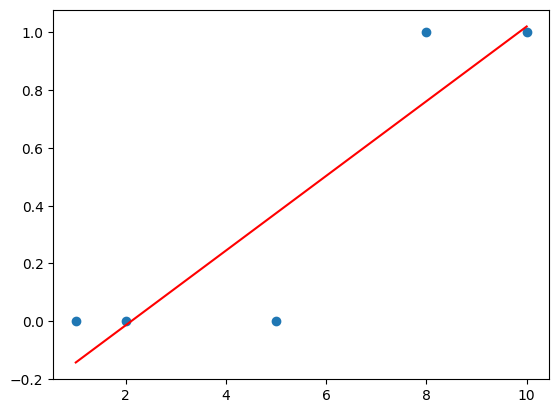

In [32]:
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

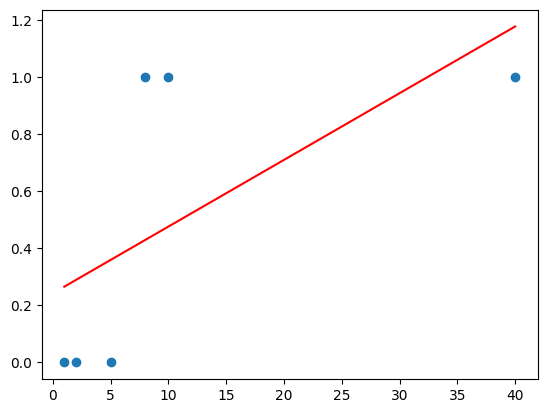

In [33]:
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

### 스케일 조정
- MinMaxScaler, StandardScaler
  0~1             -2 ~2 주로 0근처

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_Y_data = 

In [35]:
# 교안 50pt
import numpy as np
X_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0],])
# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
#cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%800==0:
        print("{}번째 cost:{}".format(step, cost_val))

800번째 cost:0.21701574325561523
1600번째 cost:0.1685631424188614
2400번째 cost:0.14172370731830597
3200번째 cost:0.12260843813419342
4000번째 cost:0.10790567100048065
4800번째 cost:0.09618081152439117
5600번째 cost:0.08661619573831558
6400번째 cost:0.07867974787950516
7200번째 cost:0.07200179994106293
8000번째 cost:0.06631531566381454


In [40]:
#모델 사용
input_data = np.array([[5,2]])
predict = tf.cast(H>0.5,dtype = tf.float32)
sess.run(predict,feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [43]:
# accuracy
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


# 4. XOR

In [44]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개 W, b
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:0.7163499593734741
1000번째 cost:0.693812370300293
2000번째 cost:0.6933637261390686
3000번째 cost:0.6932220458984375
4000번째 cost:0.6931744813919067
5000번째 cost:0.6931576728820801
6000번째 cost:0.6931514143943787
7000번째 cost:0.6931489706039429
8000번째 cost:0.6931479573249817


In [45]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 0.5


# 5. Deep Learning XOR 예제

In [46]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : (입력2, 출력4)
W1 = tf.Variable(tf.random.normal([2, 4]))
b1 = tf.Variable(tf.random.normal([4]))
# H
layer1= tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : (입력4, 출력1)
W2 = tf.Variable(tf.random.normal([4, 1]))
b2 = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(layer1, W2) + b2
H      = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:1.1603670120239258
1000번째 cost:0.496833473443985
2000번째 cost:0.35898083448410034
3000번째 cost:0.21803580224514008
4000번째 cost:0.11177359521389008
5000번째 cost:0.06945104897022247
6000번째 cost:0.0493551529943943
7000번째 cost:0.03884245455265045
8000번째 cost:0.03190760314464569
9000번째 cost:0.026991546154022217
10000번째 cost:0.023329192772507668


In [47]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


## layer층 x_data 2개 ->4->1을
## layer층 x_data 2개 ->10->20->10->1
                           입력층 hidden layer(relu) 출력층(sigmoid)


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential #모델 객체 생성
from tensorflow.keras.layers import Input, Dense #layers층을 쌓을때 필요

In [3]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])